A Daniel Gonzalez Model

This model will show the correlation of the birthweight.xlsx data set. Some tries were made to lower P-Values like .log function, creating dummies variable and much more. At the end, I tried mi best.

Some cells are multiplied since there are some correlation between each other.

Like:

    meduc and feduc:  
         Research show that education between the the pair can have influence in the birth of the baby. Better 
         education, in most cases, means that the preparation of the baby is better.
        
        Links to the article:
        https://ftp.iza.org/dp2640.pdf      
        https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3017319/
        
     cigarette and drinks:
         Compared with infants born to nonsmoking mothers, mean birth weight was 320g lower in newborns whose 
         mothers smoked 6–10 cigarettes per day and 435 g lower in newborns whose mothers smoked 11–40 cigarettes 
         per day during pregnancy.
         
         Link to the article:
         https://bmcpregnancychildbirth.biomedcentral.com/articles/10.1186/s12884-018-1694-4
         
         There is a risk that the baby weight can be affected and have more consequences in birth.
         
         Link to the article:
         https://pubmed.ncbi.nlm.nih.gov/1746254/
         

In [1325]:
# importing libraries
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = "./birthweight_low.xlsx"


# reading the file into Python
birth = pd.read_excel(  io        = file,
                       header     =   0,
                       sheet_name =   0)

# verification that the data was succefully uploaded 
birth.head(10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Maneging the Missing Values</h4><br>
Identifying the missing values in every file should be the first thing o do to clean-up the data.
Having missing values could bring problems and regression will not run properly.

In [1326]:
#identifing the mising values
birth.isnull().any(axis = 0)

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Creating a loop to generate flagged columns</h4><br>
The last 4 rows of the birth DataFrame will be displayed to make sure new columns have been created.

In [1327]:
# looping to detect features with missing values
for col in birth:

    # creating columns with 1s if missing and 0 if not
    if birth[col].isnull().astype(int).sum() > 0:
        birth['m_'+col] = birth[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birth.iloc[ :, -4: ].sum(axis = 0)

bwght      653481
m_meduc         3
m_npvis         3
m_feduc         7
dtype: int64

Making sure the new columns were created

In [1328]:
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Replacing missing values for 0</h4><br>
Replacing the missing values for 3 columns that were identify. By analyzing the data, there is a chance some people don't have education at all or have never went to do prenatal visits. For that reason,a decision was made of filling the missing values with zeros.

In [1329]:
#inserting 0 in colums with missing values

#variable for fill
fill = 0

#meduc
birth["meduc"] = birth["meduc"].fillna(value = fill)

#npvis
birth["npvis"] = birth["npvis"].fillna(value = fill)

#feduc
birth["feduc"] = birth["feduc"].fillna(value = fill)

The method below was used to covert the missing values for mode, but didn't prove anything significant

#meduc
birth["meduc"].fillna(birth["meduc"].median(), inplace = True)

#npvis
birth["npvis"].fillna(birth["npvis"].median(), inplace = True)

#feduc
birth["feduc"].fillna(birth["npvis"].median(), inplace = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Verifying that the missing value were replace properly </h4><br>
Replacing the missing values for 3 columns that were identify 

In [1330]:
#making sure the code for fillna works
birth.isnull().any(axis = 0)

mage       False
meduc      False
monpre     False
npvis      False
fage       False
feduc      False
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
dtype: bool

Making sure that the missing values are replace by seeing the first of meduc since that missing. 

In [1331]:
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,0.0,5,2.0,62,0.0,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Running our first Regression </h4><br>
Running the first regression to see how on what are we working  

In [1332]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  bwght ~ mage""",
                                     data = birth)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     53.17
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.57e-12
Time:                        22:31:11   Log-Likelihood:                -1522.4
No. Observations:                 196   AIC:                             3049.
Df Residuals:                     194   BIC:                             3055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4509.0849    166.279     27.118      0.0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Creating lologarithmic  values</h4><br>
Logarithmic values were created to analyze the data

In [1333]:
# log transforming Sale_Price and saving it to the dataset
birth['log_meduc'] = np.log(birth['meduc'] + 0.001)
birth['log_monpre'] = np.log(birth['monpre'] + 0.001)
birth['log_feduc'] = np.log(birth['feduc'] + 0.001)
birth['log_npvis'] = np.log(birth['npvis'] + 0.001)
birth['log_omaps'] = np.log(birth['omaps'] + 0.001)
birth['log_bwght'] = np.log(birth['bwght'] + 0.001)


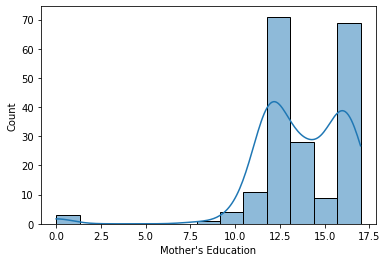

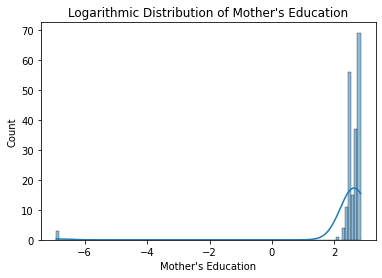

In [1334]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birth,
             x      = "meduc",
             kde    = True)


# title and axis labels
plt.xlabel(xlabel = "Mother's Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birth,
             x      = "log_meduc",
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's Education")
plt.xlabel(xlabel = "Mother's Education") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
After non of the log function show any significant difference in the Regression,
the best move was to drop them. 

In [1335]:
#dropping Logaritmic Distributions
birth = birth.drop(["log_meduc",
                    "log_monpre", 
                    "log_feduc", 
                    "log_npvis",
                    "log_omaps",
                    "log_bwght"], axis = 1)

In [1336]:
#making sure every column was dropped
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc
0,69,0.0,5,2.0,62,0.0,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Counting zeroes</h4><br>
Counting the number of zeroes to make sure if the number is significant enough to keep working on them

In [1337]:
# counting the number of zeroes for 
meduc_zeroes     = len(birth["meduc"][birth["meduc"] == 0]) # Total_Bsmt_SF
npvis_zeroes     = len(birth["npvis"][birth["npvis"] == 0])  # Second_Flr_SF
feduc_zeroes     = len(birth["feduc"][birth["feduc"] == 0])  # Garage_Area


# printing a table of the results
print(f"""
                              No\t\tYes
                   ---------------------
Mothe's Education            | {meduc_zeroes}\t\t{len(birth) - meduc_zeroes}
Total # of prenatal visits   | {npvis_zeroes}\t\t{len(birth) - npvis_zeroes}
Father's Education Years     | {feduc_zeroes}\t\t{len(birth) - feduc_zeroes}
""")


                              No		Yes
                   ---------------------
Mothe's Education            | 3		193
Total # of prenatal visits   | 3		193
Father's Education Years     | 7		189



Numbers are not significant enough to create other variables like has_meduc

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Creating Dummies for variables that are affecting the regression to have a better analysis. Deleted on the long term because it didn't bring enough relevance in the data.

birth_dummies = pd.get_dummies (drop_first = True,
                               data        = birth.loc[ : , ["monpre", "fage"]])

birth = pd.concat([birth, birth_dummies ], axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Showing all the columns</h4><br>
Making a copy of the bith data set. Dropping the y variable.


In [1338]:
# making a copy of housing
birth_explanatory = birth.copy()


# dropping Birth Weight and Order from the explanatory variable set
birth_explanatory = birth_explanatory.drop(["bwght"], axis = 1)


# formatting each explanatory variable for statsmodels
for val in birth_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Running a second Regression before deleting columns</h4><br>
Building a Regression with all the x_variables to see the correlation of each other and start moving forward.

In [1339]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  bwght ~mage +
                                            meduc +
                                            monpre +
                                            npvis +
                                            fage +
                                            feduc +
                                            omaps +
                                            fmaps +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth +
                                            m_meduc +
                                            m_npvis +
                                            m_feduc """,
                                     data = birth)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     26.64
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.85e-41
Time:                        22:31:12   Log-Likelihood:                -1417.6
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     177   BIC:                             2936.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2291.5624    295.737      7.749      0.0

After seeing some of the variables with high P-Values, the majority of my time was invest on analyzing the variables to see how the P-Values decrease to numbers equal or greater than 0.05

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Running a third Regression with deleted variables</h4><br>
Running another Regression to see the improvment in the P-Value

In [1340]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """     bwght ~ mage  +
                                                meduc * feduc +
                                                meduc +
                                                feduc +
                                                cigs * drink +
                                                cigs +
                                                drink+
                                                mwhte +
                                                mblck+
                                                moth +
                                                fwhte +
                                                fblck +
                                                foth +                                              
                                                m_feduc
                                             """,
                                     data = birth)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     41.83
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.81e-46
Time:                        22:31:12   Log-Likelihood:                -1416.8
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     183   BIC:                             2902.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2062.8076    231.676      8.904      

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Preparing explanatory variables</h4><br>
Preparing data to start other types of models

In [1341]:
#preparing some explanatory variable
birth_data   = birth.drop(["bwght"], axis = 1)


# preparing response variables
birth_target = birth.loc[ : , "bwght"]



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data,
            birth_target, #just too check, you can change it to log version
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
# breaking data into two sets
print(f"""
Training Data
-------------
X-side: {x_train.shape} 
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20) 
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Decision made to create new columns</h4><br>
A decision was made to create columns with multiplication of columns with correlations with each others

In [1342]:
#multiplying colums together since the data cannot read it as we like 
birth["meduc_and_feduc"] = birth["meduc"] * birth ["feduc"]
birth["cigs_and_drink"] = birth["cigs"] * birth["drink"]

#making sure they were created
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,meduc_and_feduc,cigs_and_drink
0,69,0.0,5,2.0,62,0.0,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,0.0,207
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,132.0,275
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,144.0,252
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,256.0,210
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,144.0,221


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Last set of variable use</h4><br>
Creating a list with our variable for x. The following variables were the one 
that seems reasonable enough to keep going with. 

In [1343]:
#declaring x-variables into list
x_variables = [ "mage", "cigs", "drink" , "m_feduc", "meduc_and_feduc"]

#loop to make the x-variable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
cigs +
drink +
m_feduc +
meduc_and_feduc +


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Verifying the Regression with a better selection of variables used. Some of them were removed since they didn't prove enough relevance on the correlations. 

In [1344]:
# merging x_train and y_train so that they can be used in statsmodels
birth_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                        meduc * feduc +
                                        cigs +
                                        drink +
                                        m_feduc """,
                                data = birth_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     54.90
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.85e-37
Time:                        22:31:12   Log-Likelihood:                -1067.2
No. Observations:                 147   AIC:                             2150.
Df Residuals:                     139   BIC:                             2174.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3937.8338    364.156     10.814      

Are P-Values are really similar to our previous regression. Now, our R-Square is higher than before.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Stating to identify our best model</h4><br>
Now that we have reviewed the P-Values for the x_variables, our next step is to prepare them in scikit-learn so that we can see how they predict on new data.

In [1345]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birth.loc[ :, x_variables ]


# remembering what are we modeling on 
birth_target = birth.loc[ :, "bwght"]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_data,     # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

<h4>OLS Information</h4><br>

In [1346]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))  # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7171
OLS Testing Score  : 0.6389
OLS Train-Test Gap : 0.0782


Gap is really big at in this model, but the lowest of them all.

<h4>Lasso Information</h4><br>

In [1347]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, # can swith from Laso, ARD etc.
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7421
Lasso Testing Score  : 0.6279
Lasso Train-Test Gap : 0.1142


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Gap was significant big

<h4>ARD Information</h4><br>

In [1348]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False) # default magitude



# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.737
Testing Score : 0.642
ARD Train-Test Gap : 0.095


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Gap still bigger that we wanted

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Comparing Result</h4><br>

In [1349]:
# comparing results

print(f"""
Model      Train Score      Test Score       Test Gap
-----      -----------      ----------       ----------
*OLS        {lr_train_score}           {lr_test_score}           {lr_test_gap}
 Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
 ARD        {ard_train_score}            {ard_test_score}            {ard_test_gap}

*best score
 Beside the second highest Test Score, it had the best overall performance in gap that means 
 that the data variable that we use on this was had a lower amount of noise and the x_variables
 have more correlation compare to others. Still knowing that the data is a bit noisy, 
 this is my best try at the moment. 
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score       Test Gap
-----      -----------      ----------       ----------
*OLS        0.7171           0.6389           0.0782
 Lasso      0.7421           0.6279           0.1142
 ARD        0.737            0.642            0.095

*best score
 Beside the second highest Test Score, it had the best overall performance in gap that means 
 that the data variable that we use on this was had a lower amount of noise and the x_variables
 have more correlation compare to others. Still knowing that the data is a bit noisy, 
 this is my best try at the moment. 

